In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
rfr = pd.read_csv('data_with_blockchain_ltc.csv')


In [3]:
rfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1824 non-null   int64  
 1   date            1824 non-null   object 
 2   block_height    1824 non-null   int64  
 3   hashrate        1824 non-null   float64
 4   difficulty      1824 non-null   float64
 5   current_supply  1824 non-null   float64
 6   Open            1824 non-null   float64
 7   High            1824 non-null   float64
 8   Low             1824 non-null   float64
 9   Close           1824 non-null   float64
 10  close_nextday   1824 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 156.9+ KB


In [4]:
rfr.head()

,Unnamed: 0,date,block_height,hashrate,difficulty,current_supply,Open,High,Low,Close,close_nextday
0,0,2018-05-25,1428130,312.407646,1.130795e+07,5.670133e+07,122.65,124.58,116.63,118.87,118.45
1,1,2018-05-26,1428661,299.212605,1.130795e+07,5.671461e+07,118.78,122.46,117.18,118.45,117.71
2,2,2018-05-27,1429231,320.362460,1.130795e+07,5.672886e+07,118.35,119.00,116.58,117.71,110.82
3,3,2018-05-28,1429802,312.077570,1.099874e+07,5.674313e+07,117.72,118.97,110.00,110.82,119.28
4,4,2018-05-29,1430374,310.189298,1.092329e+07,5.675743e+07,110.66,122.71,109.41,119.28,117.18


In [5]:
rfr.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
rfr.set_index('date', inplace=True)

In [7]:
rfr.head()

,block_height,hashrate,difficulty,current_supply,Open,High,Low,Close,close_nextday
date,,,,,,,,,
2018-05-25,1428130,312.407646,1.130795e+07,5.670133e+07,122.65,124.58,116.63,118.87,118.45
2018-05-26,1428661,299.212605,1.130795e+07,5.671461e+07,118.78,122.46,117.18,118.45,117.71
2018-05-27,1429231,320.362460,1.130795e+07,5.672886e+07,118.35,119.00,116.58,117.71,110.82
2018-05-28,1429802,312.077570,1.099874e+07,5.674313e+07,117.72,118.97,110.00,110.82,119.28
2018-05-29,1430374,310.189298,1.092329e+07,5.675743e+07,110.66,122.71,109.41,119.28,117.18


In [8]:
rfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1824 entries, 2018-05-25 to 2023-05-22
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   block_height    1824 non-null   int64  
 1   hashrate        1824 non-null   float64
 2   difficulty      1824 non-null   float64
 3   current_supply  1824 non-null   float64
 4   Open            1824 non-null   float64
 5   High            1824 non-null   float64
 6   Low             1824 non-null   float64
 7   Close           1824 non-null   float64
 8   close_nextday   1824 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 142.5+ KB


In [9]:
# Subset dataset into X, y. X is features, y is target

X = rfr.drop(labels=['close_nextday'], axis=1) #FEATURES
y = rfr['close_nextday']   #TARGET 

print(X.head())

            block_height    hashrate    difficulty  current_supply    Open  \
date                                                                         
2018-05-25       1428130  312.407646  1.130795e+07    5.670133e+07  122.65   
2018-05-26       1428661  299.212605  1.130795e+07    5.671461e+07  118.78   
2018-05-27       1429231  320.362460  1.130795e+07    5.672886e+07  118.35   
2018-05-28       1429802  312.077570  1.099874e+07    5.674313e+07  117.72   
2018-05-29       1430374  310.189298  1.092329e+07    5.675743e+07  110.66   

              High     Low   Close  
date                                
2018-05-25  124.58  116.63  118.87  
2018-05-26  122.46  117.18  118.45  
2018-05-27  119.00  116.58  117.71  
2018-05-28  118.97  110.00  110.82  
2018-05-29  122.71  109.41  119.28  


In [10]:
# Split X, y using TimeSeriesSplit() into X_train, X_test, y_train, y_test. First 75% is training, 25% is test
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5)  # n_splits = 3-1...2 splits

for train_index, test_index in tss.split(X):
    X_train_split, X_test_split = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train_split, y_test_split = y.iloc[train_index], y.iloc[test_index]

In [11]:
# Check train, test splits for correct date alignment and matching shape

print("X_train:\n", X_train_split, X_train_split.shape, "\n", '\nX_test:\n',
      X_test_split, X_test_split.shape)
print("\n")
print("y_train:\n", y_train_split, y_train_split.shape, "\n", '\ny_test:\n',
      y_test_split, y_test_split.shape)

X_train:
             block_height    hashrate    difficulty  current_supply    Open  \
date                                                                         
2018-05-25       1428130  312.407646  1.130795e+07    5.670133e+07  122.65   
2018-05-26       1428661  299.212605  1.130795e+07    5.671461e+07  118.78   
2018-05-27       1429231  320.362460  1.130795e+07    5.672886e+07  118.35   
2018-05-28       1429802  312.077570  1.099874e+07    5.674313e+07  117.72   
2018-05-29       1430374  310.189298  1.092329e+07    5.675743e+07  110.66   
...                  ...         ...           ...             ...     ...   
2022-07-18       2300158  438.611438  1.372841e+07    7.075002e+07   55.76   
2022-07-19       2300708  391.336869  1.430409e+07    7.075697e+07   58.59   
2022-07-20       2301285  414.164500  1.442736e+07    7.076411e+07   57.90   
2022-07-21       2301813  380.158101  1.442736e+07    7.077071e+07   57.20   
2022-07-22       2302396  415.510209  1.434015e+07    

In [12]:
# Reshape y train, test to match X train, test

y_train = y_train_split.values.reshape(-1, 1)
y_test = y_test_split.values.reshape(-1, 1)

print(y_train)

[[118.45]
 [117.71]
 [110.82]
 ...
 [ 58.02]
 [ 56.09]
 [ 56.32]]


In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train_split)
X_test = ss.transform(X_test_split)
y_train = ss.fit_transform(y_train)
y_test = ss.transform(y_test)


In [14]:
# Make sure shape is same before scaling.

print("X Train:", type(X_train), X_train.shape, len(X_train))
print("\nX Test:", type(X_test), X_test.shape, len(X_test))
print("\ny Train:", type(y_train), y_train.shape, len(y_train))
print("\ny Test:", type(y_test), y_test.shape, len(y_test))

X Train: <class 'numpy.ndarray'> (1520, 8) 1520

X Test: <class 'numpy.ndarray'> (304, 8) 304

y Train: <class 'numpy.ndarray'> (1520, 1) 1520

y Test: <class 'numpy.ndarray'> (304, 1) 304


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

rfr_params = {
    "n_estimators": [100, 200, 300, 400, 500],
    'max_depth': range(5, 10),  # Reduce the range of max_depth
    "max_features": ["auto"],
    "bootstrap": [True, False]
}


# ols_pipe = Pipeline([('poly', PolynomialFeatures()),
#                      ('fit', LinearRegression())])
# lasso_pipe = Pipeline([('poly', PolynomialFeatures()),
#                        ('fit', Lasso())])
# ridge_pipe = Pipeline([('poly', PolynomialFeatures()),
#                        ('fit', Ridge())])

# models = {
#     'OLS':
#     ols_pipe,
#     'Lasso':
#     GridSearchCV(lasso_pipe,
#                  param_grid=lasso_params).fit(X_train,
#                                               y_train).best_estimator_,
#     'Ridge':
#     GridSearchCV(ridge_pipe,
#                  param_grid=ridge_params).fit(X_train,
#                                               y_train).best_estimator_,
#     'RFR':
#     GridSearchCV(RandomForestRegressor(oob_score=True),
#                  param_grid=rfr_params).fit(X_train, y_train).best_estimator_,
# }

# Create model test variables for visual performance evaluation

# pred_ols = models['OLS'].fit(X_train, y_train).predict(X_test)
# pred_lasso = models['Lasso'].fit(X_train, y_train).predict(X_test)
# pred_ridge = models['Ridge'].fit(X_train, y_train).predict(X_test)
# pred_rfr = models['RFR'].fit(X_train, y_train).predict(X_test)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Ridge

model = {
    'RFR':
    GridSearchCV(RandomForestRegressor(oob_score=True),
                 param_grid=rfr_params).fit(X_train, y_train).best_estimator_,
}


/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

In [17]:
# feature_importances = model['RFR'].feature_importances_
# important_features_indices = np.argsort(feature_importances)[::-1][:4]  # Select top k features
# X_train_selected = X_train[:, important_features_indices]
# X_test_selected = X_test[:, important_features_indices]
# print(X_train_selected)

In [18]:
pred_rfr = model['RFR'].fit(X_train, y_train).predict(X_test)


/var/folders/q7/1k7jcrmx4rv8bqn_fgk78smm0000gn/T/ipykernel_3309/519672745.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  pred_rfr = model['RFR'].fit(X_train, y_train).predict(X_test)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn import metrics

model['RFR'].fit(X_train, y_train)  # Fit the Random Forest model

# Perform cross-validation
scores = cross_val_score(model['RFR'], X_train, y_train)

print("Cross-validated R^2 scores:", scores)

# Model performance comparison between train and test
pred_train = model['RFR'].predict(X_train)
pred_test = model['RFR'].predict(X_test)

scores = pd.DataFrame(index=['R^2', 'MAE', 'MSE', 'MAPE', 'RMSE'], columns=['Train', 'Test'])
scores['Train']['R^2'] = r2_score(y_train, pred_train)
scores['Test']['R^2'] = r2_score(y_test, pred_test)
scores['Train']['MAE'] = mean_absolute_error(y_train, pred_train)
scores['Test']['MAE'] = mean_absolute_error(y_test, pred_test)
scores['Train']['MSE'] = mean_squared_error(y_train, pred_train)
scores['Test']['MSE'] = mean_squared_error(y_test, pred_test)
scores['Train']['MAPE'] = mean_absolute_percentage_error(y_train, pred_train)
scores['Test']['MAPE'] = mean_absolute_percentage_error(y_test, pred_test)
scores['Train']['RMSE'] = np.sqrt(scores['Train']['MSE'])
scores['Test']['RMSE'] = np.sqrt(scores['Test']['MSE'])

# OOB Score
scores['Train']['OOB'] = model['RFR'].oob_score_


/var/folders/q7/1k7jcrmx4rv8bqn_fgk78smm0000gn/T/ipykernel_3309/786089495.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model['RFR'].fit(X_train, y_train)  # Fit the Random Forest model
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/a

Cross-validated R^2 scores: [0.96726384 0.96735998 0.93784432 0.84368593 0.97689844]


In [20]:
print("Model performance:\n", scores)


Model performance:
          Train      Test
R^2   0.993287  0.926942
MAE    0.05086  0.050965
MSE   0.006713  0.005005
MAPE  0.239301  1.591874
RMSE  0.081934  0.070748


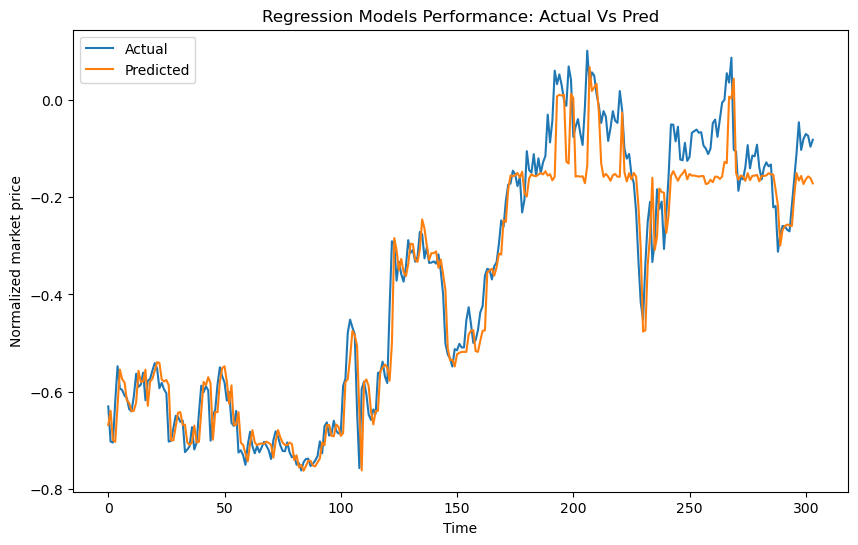

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(pred_rfr, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Normalized market price')
plt.legend()
plt.title('Regression Models Performance: Actual Vs Pred')
plt.show()


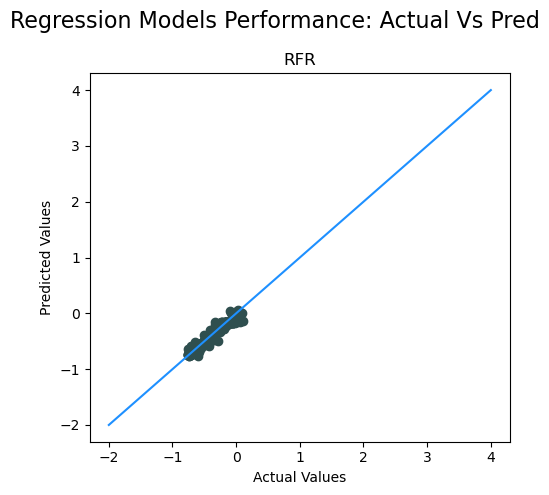

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(5, 5))
fig.suptitle('Regression Models Performance: Actual Vs Pred', fontsize=16)

colors = ['darkslategrey']

axs.scatter(y_test, pred_rfr, c=colors)
axs.plot([-2, 4], [-2, 4], color='dodgerblue')
axs.set_title("RFR")
axs.set_xlabel('Actual Values')
axs.set_ylabel('Predicted Values')

fig.tight_layout()
plt.show()

In [23]:
!pip install keras

In [28]:

# Assuming you have trained and instantiated a Keras model called 'model'
# ...

# Save the model
model.save('RFR_litecoin.h5')


AttributeError: 'dict' object has no attribute 'save'